In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from gen_wordcloud import *

In [3]:
#read data
python = pd.read_excel('../data/Github_python.xlsx')
java = pd.read_excel('../data/Github_java.xlsx')
C = pd.read_excel('../data/Github_C.xlsx')
java_s = pd.read_excel('../data/Github_javascript.xlsx')
Cpp = pd.read_excel('../data/Github_Cpp.xlsx')
C_sharp = pd.read_excel('../data/Github_Csharp.xlsx')

In [4]:
#add a language column
python['Language'] = 'Python'
java['Language'] = 'Java'
C['Language'] = 'C'
java_s['Language'] = 'JavaScript'
Cpp['Language'] = 'C++'
C_sharp['Language'] = 'C#'

In [5]:
#concat to one DataFrame
data = pd.concat([python, java, C, java_s, Cpp, C_sharp], axis = 0, ignore_index = True)
data.to_excel('../data/Github_all.xlsx')
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.set_index('Full Name')

In [6]:
#select rows with stats > 10000
data = data[data['Stars'] >= 10000]
data = data.sort_values(by = 'Stars', ascending = False)

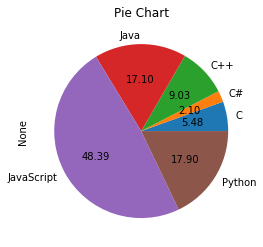

In [7]:
#draw pie chart
x  = data.groupby('Language').apply(len)
x.plot(kind = 'pie', subplots = True, autopct = '%.2f')
plt.title('Pie Chart')
plt.savefig('../picture/pie.png')
plt.show()

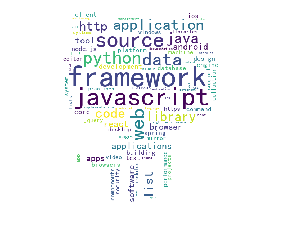

In [8]:
#generate wordcloud
wordcloud = gen_wordcloud(data.reset_index())
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('../picture/wordcloud_all.jpg')


In [169]:
data

,Description,Stars,Forks,Created Time,Size,Owner Type,Owner Location,Owner Followers,Repo_num,Company,Language
Full Name,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,The https://www.freeCodeCamp.org open source c...,307351,23326,2014-12-24,121852,Organization,Just here on Earth... for now,0,126,NaN,JavaScript
tensorflow/tensorflow,An Open Source Machine Learning Framework for ...,138748,78980,2015-11-07,456557,Organization,NaN,0,86,NaN,C++
twbs/bootstrap,"The most popular HTML, CSS, and JavaScript fra...",137529,67652,2011-07-29,150022,Organization,San Francisco,0,22,NaN,JavaScript
d3/d3,"Bring data to life with SVG, Canvas and HTML. ...",88992,21628,2010-09-27,41490,Organization,"San Francisco, CA",0,52,NaN,JavaScript
CyC2018/CS-Notes,:books: 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计...,85486,27435,2018-02-13,111417,User,"Guangzhou, China",8919,17,@ByteDance,Java
...,...,...,...,...,...,...,...,...,...,...,...
microsoft/LightGBM,"A fast, distributed, high performance gradient...",10108,2692,2016-08-05,10845,Organization,"Redmond, WA",0,2893,NaN,C++
alibaba/Sentinel,A lightweight powerful flow control component ...,10085,3039,2018-04-04,4364,Organization,"Hangzhou, China",0,287,NaN,Java
notepad-plus-plus/notepad-plus-plus,Notepad++ official repository,10045,2553,2015-03-28,181704,Organization,NaN,0,4,NaN,C++


In [26]:
data_loc = data[data['Owner Location'] != 'NaN']
data_loc.to_excel('../data/Github_loc.xlsx')
data_comp = data[data['Company'] != 'Nan']
data_comp.to_excel('../data/Github_comp.xlsx')

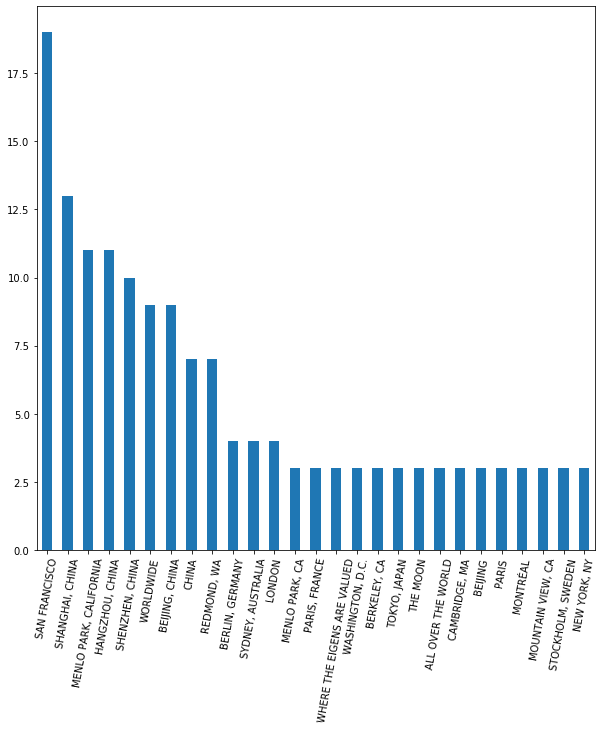

In [168]:

loc = data_loc.groupby('Owner Location').apply(len)
loc.index = [x.upper() for x in loc.index]

for location in loc.index:
    if 'SAN FRANCISCO' in location:
        loc['SAN FRANCISCO'] += loc[location]
        loc[location] = 0
    if 'SHANGHAI' in location:
        temp = loc[location]
        loc[location] = 0
        loc['SHANGHAI, CHINA'] += temp

loc['OTHERS'] = 0
loc = loc.sort_values(ascending = False)
plt.figure(figsize = (10,10))
loc[loc.values >=3].plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.savefig('../picture/loc.png')
plt.show()

In [34]:
company = data_comp.groupby('Company').apply(len)
company[in campany.index]
company.sort_values(ascending = False).head(50)

Company
@facebook                            6
Facebook                             4
Yoni Goldberg                        2
Oval Money                           2
@growthbunker                        2
@objectbox                           2
@facebook                            2
Uber                                 2
@Strikingly                          2
Xonay Media                          2
Google, Inc.                         2
@mercari                             2
Bocoup                               2
Beijing Normal University            2
@ChessCom, previously Razer, Inc.    2
@supermind                           1
Baeldung                             1
@observablehq                        1
@parallax                            1
@resemble-ai                         1
Atlassian                            1
Alibaba                              1
Alibaba Inc.                         1
@travelping                          1
@wireapp                             1
@寻人微博 机器人作者      